# Lab 1

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

df = pd.read_csv('ds_salary.csv')

## 1. General Salary Data
Start by plotting and describing the general shape of the salary data. This initial
step sets the foundation for your analysis.

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
576,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
577,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
578,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
579,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## 2. Effect of Experience on Salary
Investigate how experience influences data scientist salaries. Create visualizations or
tables to illustrate any trends or patterns.

## 3. Impact of Company Size on Salary
Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.

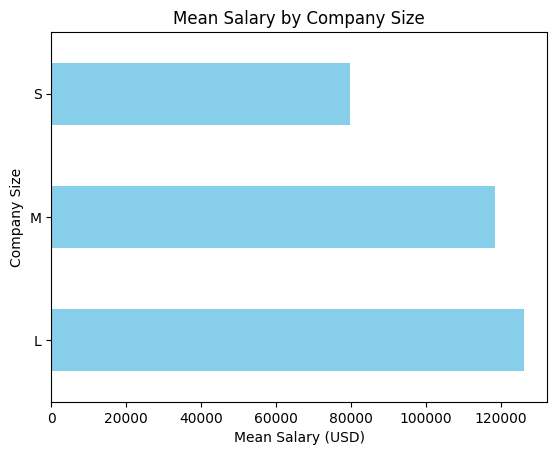

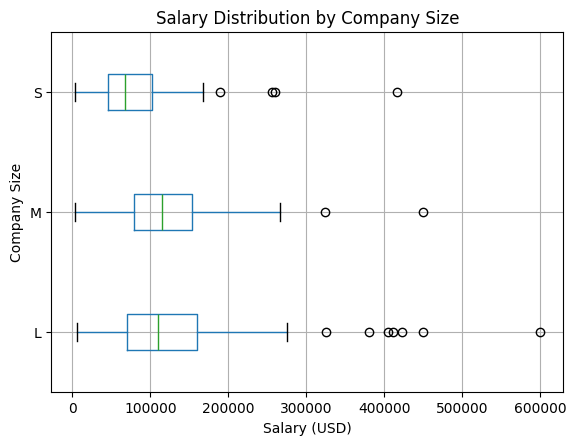

F-value: 12.765998591696347, P-value: 3.756285988564403e-06


In [32]:
# Mean salary by company size
mean_salaries = df.groupby('company_size')['salary_in_usd'].mean()
mean_salaries.plot(kind='barh', color='skyblue')
plt.title('Mean Salary by Company Size')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Company Size')
plt.show()

# Boxplots showing how company size influences salary
df.boxplot(column='salary_in_usd', by='company_size', vert=False)
plt.title('Salary Distribution by Company Size')
plt.suptitle('') 
plt.xlabel('Salary (USD)')
plt.ylabel('Company Size')
plt.show()

# Anova
f_value, p_value = stats.f_oneway(
    df[df['company_size'] == 'L']['salary_in_usd'],
    df[df['company_size'] == 'M']['salary_in_usd'],
    df[df['company_size'] == 'S']['salary_in_usd']
)

print(f"F-value: {f_value}, P-value: {p_value}")


The first plot shows the mean salaries between the different companies, this shows that while smaller companies pay lower salaries, the medium and large companies pay similar salaries.

The second plot is a box plot, which helps us to see the outliers, which shows us that the larger company actually has a lower mean salary when not considering outliers.

Last is a one-way anova analysis, which gives us an F-value of 12.765 and a P-value of 3.756e-06. The high F-value tells us that the variance between the groups are higher than the variance of the salaries within the groups. This signifies that the group means differ. The extremely low P-value tells us that there is a significant difference between the size of the company you work for.

In conclusion, if you work at a larger company, you are more likely to make more money.

## 4. Job Title Analysis
Job titles can vary significantly. For this project, select a keyword or phrase to distinguish
between different job titles. For instance, you can differentiate between job
titles containing the word ”Analyst” and those that do not. To achieve this, you may
find the str.contains function in Pandas helpful. Refer to this resource for examples:
https://www.geeksforgeeks.org/python-pandas-series-str-contains. Explore
various job titles to decide on the keyword or phrase you want to focus on.

## 5. Interactions Between Relationships
Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection
of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination.

## 6. Conclusion
Summarize your findings by listing all significant relationships you have discovered
during your analysis.